<a href="https://colab.research.google.com/github/ukishore33/Capstone-project-on-Corona_dataset/blob/main/The_Project_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project on Analysing Covid 19 Dataset

## 1.Introduction

The creation of precise and effective technologies for disease prediction is now more important than ever because the COVID-19 pandemic is still active and the entire world is combating it. In response to this demand, our proposal attempts to develop a machine learning model that can determine a person's COVID-19 status based on a dataset of symptoms. We seek to improve the efficiency and speed of COVID-19 diagnosis through the use of machine learning algorithms, thereby assisting in efficient medical care and easing the strain on healthcare systems.

#### Importance in Today's World:

There is an urgent need for effective and trustworthy diagnostic techniques since the COVID-19 epidemic has overrun healthcare systems globally. Traditional diagnostic techniques, including PCR testing, can involve lengthy laboratory processes and have a testing capacity cap. We suggest a promising approach by creating a machine learning model for COVID-19 prediction that can deliver quick and precise diagnoses based solely on symptoms, eliminating the need for comprehensive laboratory tests. This can significantly increase the early detection of COVID-19 cases, allowing for rapid medical intervention and the efficient use of available resources for healthcare.

#### Improving Medical Treatment:

An important factor in enhancing the effectiveness of medical treatment is accurate illness prognosis. Our machine learning algorithm can enable early intervention, prompt medical care, and the adoption of required preventative measures by precisely identifying people who are likely to be COVID-19 positive. This early discovery can lessen the severity of symptoms, stop the progression of the disease, and enhance patient outcomes in general.

#### Impact on the Medical Field:

Our machine learning approach can be used to create an efficient screening tool that will have a big influence on the medical industry. By speeding the diagnostic process, it can greatly lessen the strain on healthcare systems, especially in places with limited testing capabilities. Healthcare resources can be effectively identified as COVID-19 positive persons, ensuring that urgent cases receive care right away while avoiding the wasteful use of resources for low-risk situations. This focused use of resources can aid in controlling the influx of patients, enhancing the quality of healthcare overall, and perhaps even saving lives.

#### Future Applications and Knowledge Gap:

Beyond its immediate applicability in COVID-19 prediction, our suggested machine learning approach can serve as a valuable platform for predicting various diseases based on symptoms. The expertise obtained from constructing this model, such as feature selection strategies and computational approaches, can be applied to future disease prediction efforts. This has the potential to solve knowledge gaps in numerous healthcare sectors, enabling for faster and more accurate identification of disorders beyond COVID-19. The ability to anticipate diseases accurately has far-reaching consequences for personalized medicine, public health planning, and the creation of tailored treatment techniques, ultimately leading to improved healthcare outcomes for people and communities alike.

## 2. Initial Hypothesis

Based on the dataset presented, which contains variables such as Test_date, Cough_symptoms, Fever, Sore_throat, Shortness_of_breath, Headache, Corona, Age_60_above, Sex, and Known_contact, we may construct the following initial hypothesis:

Hypothesis 1: Patients who came in direct contact with Confirmed (Covid Positive) Patients are more likely to be Corona positive.

This hypothesis argues that persons who have had close interaction with proven COVID-19 positive patients are at a higher risk of being infected themselves. The belief is that the virus spreads mostly through close proximity and direct contact with infected individuals. By studying the variable "Known_contact" in the dataset, we may analyse whether there is a correlation between known contact with COVID-19 positive patients and the likelihood of testing positive for the virus.

Hypothesis 2: Shortness_of_breath, Fever, and Cough_symptoms are essential variables in determining COVID-19 positive or negative cases.

This theory indicates that symptoms such as shortness of breath, fever, and cough are crucial indications in diagnosing COVID-19 positive cases. These symptoms are typically connected with respiratory infections and have been recognised as major symptoms of COVID-19. By evaluating the variables "Shortness_of_breath," "Fever," and "Cough_symptoms" in the dataset, we may study the association between these symptoms and the possibility of a person being COVID-19 positive or negative.

It is crucial to highlight that these are initial hypotheses based on the available dataset, and further analysis and modeling will be required to test these assumptions and find further insights related to COVID-19 prediction.

# 3. Data Analysis Approach

## 3.1 Importing Libraries

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## 3.2 Importing the Dataset

In [3]:
d=pd.read_csv('corona_tested_006.csv')
df = d.copy()

<ipython-input-3-4a3d149fdc65>:1: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  d=pd.read_csv('corona_tested_006.csv')


In [4]:
df.shape

(278848, 11)


Here , we have 2,78,848 observations and 11 variables.

## 3.3 Checking First 5 and last 5 rows of DataSet

In [5]:
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [6]:
df.tail()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other
278847,278848,30-04-2020,False,False,False,False,False,negative,None,female,Other


## 3.4 Checking number of features and their Datatypes.

In [7]:
df.dtypes

Ind_ID                  int64
Test_date              object
Cough_symptoms         object
Fever                  object
Sore_throat            object
Shortness_of_breath    object
Headache               object
Corona                 object
Age_60_above           object
Sex                    object
Known_contact          object
dtype: object

In [8]:
df.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [10]:
df.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

#### Observations

We have all the columns of Object Datatype , except Ind_ID column which is of integer datatype.
And , we have no null values in any column.

In [11]:
df.describe(include='all')

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,278848.000000,278848,278848,278848,278848,278848,278848,278848,278848,278848,278848
unique,NaN,51,5,5,5,5,5,3,3,3,3
top,NaN,20-04-2020,False,False,False,False,False,negative,None,female,Other
freq,NaN,10921,127531,137774,212584,212842,212326,260227,127320,130158,242741
mean,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,80496.628269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,69712.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,209136.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.isnull()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
278843,False,False,False,False,False,False,False,False,False,False,False
278844,False,False,False,False,False,False,False,False,False,False,False
278845,False,False,False,False,False,False,False,False,False,False,False
278846,False,False,False,False,False,False,False,False,False,False,False


## 3.5 Dropping columns and rows

In [13]:
df.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [14]:
df.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              5
Fever                       5
Sore_throat                 5
Shortness_of_breath         5
Headache                    5
Corona                      3
Age_60_above                3
Sex                         3
Known_contact               3
dtype: int64

* As the 227539 contains null values in dataset, we just drop this row from the dataset

- 'Ind_ID' and 'Test_date' which we don't need in our analysis and in model building.
- As per our business requirement , we have to divide the dataset in training set and Testing set based on Test_date , so we will keep this column now and drop it before model building and diving dataset into Training set and Test set.
- Corona is our Outcome variable.
- For now , we will drop 'Ind_ID' column.

## 3.6 Checking Duplicates

In [15]:
df.duplicated().sum()

0

- There are no duplicates in the dataset.

## 3.7 Check Unique Values

In [16]:
df.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              5
Fever                       5
Sore_throat                 5
Shortness_of_breath         5
Headache                    5
Corona                      3
Age_60_above                3
Sex                         3
Known_contact               3
dtype: int64

In [17]:
for c in df.columns:
    print("---- %s ---" % c)
    print(df[c].value_counts())

---- Ind_ID ---
1         1
185898    1
185904    1
185903    1
185902    1
         ..
92955     1
92956     1
92957     1
92958     1
278848    1
Name: Ind_ID, Length: 278848, dtype: int64
---- Test_date ---
20-04-2020    10921
19-04-2020    10199
22-04-2020     9646
21-04-2020     9624
16-04-2020     9138
23-04-2020     8744
01-04-2020     8654
13-04-2020     8425
02-04-2020     8188
03-04-2020     8079
17-04-2020     7645
05-04-2020     7509
30-04-2020     7313
27-04-2020     7304
15-04-2020     7149
31-03-2020     7134
24-04-2020     7028
26-03-2020     6663
14-04-2020     6571
28-04-2020     6334
18-04-2020     6321
26-04-2020     6131
12-04-2020     5984
27-03-2020     5963
07-04-2020     5931
30-03-2020     5915
10-04-2020     5678
28-03-2020     5602
25-03-2020     5495
06-04-2020     5368
29-03-2020     5277
04-04-2020     5145
25-04-2020     5052
24-03-2020     4735
09-04-2020     4539
11-04-2020     4341
29-04-2020     4259
08-04-2020     4058
22-03-2020     3565
23-03-2020

#### Observations

- In the columns Cough_symptoms , Fever , Sore_throat , Shortness_of_breath and Headache. We have values like TRUE ,True , False , FALSE. So , we need to address these as we have to rename and make it to True and False only.
- We also have another value of "None" in various columns like in Sex , age_60_above , Headache , Shortness_of_breath ,Fever and Cough_symptoms. So , we need to address those also.
- As these values are null values , but not recognised as Null value.
- Let's clean each column separately

- We can't see null values in data , but there are records with value as None in Age and Sex column.

#### 3.7.1 Sex

In [18]:
df['Sex'].unique()

array(['None', 'male', 'female'], dtype=object)

In [19]:
type(df['Sex'])

pandas.core.series.Series

In [20]:
column_name = 'Sex'
specific_value = 'None'

df[column_name] = df[column_name].replace(specific_value,'female')
df['Sex'].unique()

array(['female', 'male'], dtype=object)

In [21]:
df.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              5
Fever                       5
Sore_throat                 5
Shortness_of_breath         5
Headache                    5
Corona                      3
Age_60_above                3
Sex                         2
Known_contact               3
dtype: int64

#### 3.7.2 'Caugh Symptoms' column

In [22]:
df['Cough_symptoms'].unique()

array(['TRUE', 'FALSE', 'None', False, True], dtype=object)

In [23]:
df['Cough_symptoms'].replace('FALSE',False,inplace=True)

In [24]:
df['Cough_symptoms'].unique()

array(['TRUE', False, 'None', True], dtype=object)

In [25]:
df['Cough_symptoms'].replace('TRUE',True,inplace=True)

In [26]:
df['Cough_symptoms'].unique()

array([True, False, 'None'], dtype=object)

- As any values other than true value indicates, it as false value, we assume the none value as false which indicates that caugh symptoms are indicated by patient. so none value of patient is converted to false value

In [27]:
df['Cough_symptoms'].replace('None',False,inplace=True)

In [28]:
df['Cough_symptoms'].unique()

array([ True, False])

In [29]:
df[df["Cough_symptoms"] == "None"].count()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

#### 3.7.3 'Fever' Column

In [30]:
df['Fever'].unique()

array(['FALSE', 'TRUE', 'None', False, True], dtype=object)

In [31]:
df['Fever'].replace('FALSE',False,inplace=True)

In [32]:
df['Fever'].unique()

array([False, 'TRUE', 'None', True], dtype=object)

In [33]:
df['Fever'].replace('TRUE',True,inplace=True)

In [34]:
df['Fever'].unique()

array([False, True, 'None'], dtype=object)

#### Imputation of "None" value

- As any values other than true value indicates, it as false value, we assume the none value as false

- There is a lot of difference between the number of records between True and False , so it will not create bias in result.

In [35]:
df['Fever'].replace('None',False,inplace=True)

In [36]:
df['Fever'].unique()

array([False,  True])

#### 3.7.4 Sore Throat Column

In [37]:
df['Sore_throat'].unique()

array(['TRUE', 'FALSE', 'None', False, True], dtype=object)

In [38]:
df['Sore_throat'].replace('FALSE',False,inplace=True)

In [39]:
df['Sore_throat'].replace('TRUE',True,inplace=True)

In [40]:
df['Sore_throat'].unique()

array([True, False, 'None'], dtype=object)

#### Imputation of "None" value
- As any values other than true value indicates, it as false value, we assume the none value as false

- There is a lot of difference between the number of records between True and False , so it will not create bias in result.

In [41]:
df['Sore_throat'].replace('None',False,inplace=True)

In [42]:
df['Sore_throat'].unique()

array([ True, False])

#### 3.7.5 Shortness_of_breath

In [43]:
df['Shortness_of_breath'].unique()

array(['FALSE', 'TRUE', 'None', False, True], dtype=object)

In [44]:
df['Shortness_of_breath'].replace('FALSE',False,inplace=True)

In [45]:
df['Shortness_of_breath'].replace('TRUE',True,inplace=True)

In [46]:
df['Shortness_of_breath'].unique()

array([False, True, 'None'], dtype=object)

#### Imputation of "None" value
- As any values other than true value indicates, it as false value, we assume the none value as false

- There is a lot of difference between the number of records between True and False , so it will not create bias in result.

In [47]:
df['Shortness_of_breath'].replace('None',False,inplace=True)

In [48]:
df['Shortness_of_breath'].unique()

array([False,  True])

#### 3.7.6 Headache

In [49]:
df['Headache'].unique()

array(['FALSE', 'TRUE', 'None', False, True], dtype=object)

In [50]:
df['Headache'].replace('FALSE',False,inplace=True)

In [51]:
df['Headache'].replace('TRUE',True,inplace=True)

In [52]:
df['Headache'].unique()

array([False, True, 'None'], dtype=object)

#### Imputation of "None" value
- As any values other than true value indicates, it as false value, we assume the none value as false

- There is a lot of difference between the number of records between True and False , so it will not create bias in result.

In [53]:
df['Headache'].replace('None',False,inplace=True)

In [54]:
df['Headache'].unique()

array([False,  True])

#### 3.7.7 Corona

In [55]:
df['Corona'].unique()

array(['negative', 'positive', 'other'], dtype=object)

Observations :

We have three values in our outcome variable. positive , negative and other.
As per our business requirement , we must create a model which can predict whether a person is covid positive or negative.
So , we don't need to train our model for "other" value.
And , we have only a small percentage of 1% data as "other" value.
So , we can delete it from table.

In [56]:
df['Corona'].value_counts()

negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64

In [57]:
df['Corona'].replace('other','negative',inplace=True)

In [58]:
df['Corona'].value_counts()

negative    264119
positive     14729
Name: Corona, dtype: int64

#### 3.7.8 Age_60_above

In [59]:
df['Age_60_above'].unique()

array(['None', 'No', 'Yes'], dtype=object)

#### Observations :

we have a lot of values with value as "None".
There might be the reason behind "None" value , when patient's age is unknown or patient may not be comfortale with telling his age.
we can rename the value of "None" as "Unknown" .

In [60]:
df['Age_60_above'].replace('None','No',inplace=True)

In [61]:
df['Age_60_above'].unique()

array(['No', 'Yes'], dtype=object)

#### 3.7.9 Known Contact

In [62]:
df['Known_contact'].unique()

array(['Abroad', 'Contact with confirmed', 'Other'], dtype=object)

In [63]:
df.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              2
Fever                       2
Sore_throat                 2
Shortness_of_breath         2
Headache                    2
Corona                      2
Age_60_above                2
Sex                         2
Known_contact               3
dtype: int64

#### 3.7.10 Test Date

In [64]:
df['Test_date'].unique()

array(['11-03-2020', '12-03-2020', '13-03-2020', '14-03-2020',
       '15-03-2020', '16-03-2020', '17-03-2020', '18-03-2020',
       '19-03-2020', '20-03-2020', '21-03-2020', '22-03-2020',
       '23-03-2020', '24-03-2020', '25-03-2020', '26-03-2020',
       '27-03-2020', '28-03-2020', '29-03-2020', '30-03-2020',
       '31-03-2020', '01-04-2020', '02-04-2020', '03-04-2020',
       '04-04-2020', '05-04-2020', '06-04-2020', '07-04-2020',
       '08-04-2020', '09-04-2020', '10-04-2020', '11-04-2020',
       '12-04-2020', '13-04-2020', '14-04-2020', '15-04-2020',
       '16-04-2020', '17-04-2020', '18-04-2020', '19-04-2020',
       '20-04-2020', '21-04-2020', '22-04-2020', '23-04-2020',
       '24-04-2020', '25-04-2020', '26-04-2020', '27-04-2020',
       '28-04-2020', '29-04-2020', '30-04-2020'], dtype=object)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  bool  
 3   Fever                278848 non-null  bool  
 4   Sore_throat          278848 non-null  bool  
 5   Shortness_of_breath  278848 non-null  bool  
 6   Headache             278848 non-null  bool  
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: bool(5), int64(1), object(5)
memory usage: 14.1+ MB


#### Observations
- Here the column test_date is in object type.so we convert it to datetime64 type to extract separate month, date, year column from it separately for better understanding

In [66]:
df['Date']=pd.to_datetime(df['Test_date'], format="%d-%m-%Y")

In [67]:
df['Year']=pd.DatetimeIndex(df['Date']).year
df['Month']=pd.DatetimeIndex(df['Date']).month
df['Day']=pd.DatetimeIndex(df['Date']).day

In [68]:
df.drop('Test_date',axis = 1,inplace = True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Ind_ID               278848 non-null  int64         
 1   Cough_symptoms       278848 non-null  bool          
 2   Fever                278848 non-null  bool          
 3   Sore_throat          278848 non-null  bool          
 4   Shortness_of_breath  278848 non-null  bool          
 5   Headache             278848 non-null  bool          
 6   Corona               278848 non-null  object        
 7   Age_60_above         278848 non-null  object        
 8   Sex                  278848 non-null  object        
 9   Known_contact        278848 non-null  object        
 10  Date                 278848 non-null  datetime64[ns]
 11  Year                 278848 non-null  int64         
 12  Month                278848 non-null  int64         
 13  Day           

In [70]:
df.nunique()

Ind_ID                 278848
Cough_symptoms              2
Fever                       2
Sore_throat                 2
Shortness_of_breath         2
Headache                    2
Corona                      2
Age_60_above                2
Sex                         2
Known_contact               3
Date                       51
Year                        1
Month                       2
Day                        31
dtype: int64

- dropping column year because of only one unique value

In [71]:
df.drop('Year',axis = 1,inplace = True)

In [72]:
df.nunique()

Ind_ID                 278848
Cough_symptoms              2
Fever                       2
Sore_throat                 2
Shortness_of_breath         2
Headache                    2
Corona                      2
Age_60_above                2
Sex                         2
Known_contact               3
Date                       51
Month                       2
Day                        31
dtype: int64

In [73]:
df.to_csv("covid_cleaned.csv")

## 3.6 Exploratory Data Analysis

#### 3.6.1 Checking for Data Imbalance

- Corona column

- countplot

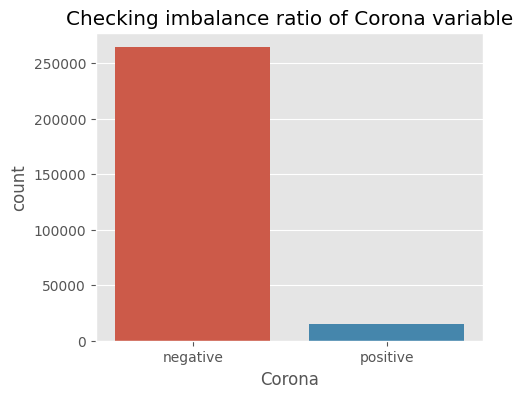

In [74]:
plt.style.use('ggplot')
plt.figure(figsize = [5,4])

sns.countplot(data=df, x='Corona')
plt.title("Checking imbalance ratio of Corona variable")
plt.show()

In [75]:
# checking exact Corona Positive to Corona negative ratio
df[df.Corona=='negative'].shape[0]/df[df.Corona=='positive'].shape[0]

17.931903048407904

- Observations : 1 in every 17 patients is Corona Positive.

In [76]:
# checking counts of corona column
print(df['Corona'].value_counts())
print()
print(df['Corona'].value_counts(normalize=True))

negative    264119
positive     14729
Name: Corona, dtype: int64

negative    0.947179
positive    0.052821
Name: Corona, dtype: float64


- piechart

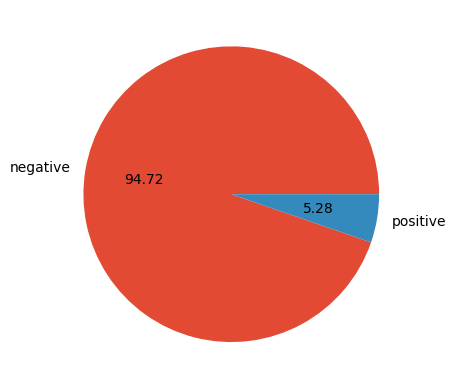

In [77]:
plt.pie(df['Corona'].value_counts(),labels = ['negative','positive'],autopct = "%0.2f")
plt.show()

- Encoding Outcome Variable(Corona)

In [78]:
df['Corona'] = df['Corona'].map({'negative' : 0 , 'positive' : 1})

- Creating new dataframe with Corona value

In [79]:
df_positive = df[df['Corona'] == 1]
df_negative = df[df['Corona'] == 0]

#### 3.6.2 Univariate Analysis

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Ind_ID               278848 non-null  int64         
 1   Cough_symptoms       278848 non-null  bool          
 2   Fever                278848 non-null  bool          
 3   Sore_throat          278848 non-null  bool          
 4   Shortness_of_breath  278848 non-null  bool          
 5   Headache             278848 non-null  bool          
 6   Corona               278848 non-null  int64         
 7   Age_60_above         278848 non-null  object        
 8   Sex                  278848 non-null  object        
 9   Known_contact        278848 non-null  object        
 10  Date                 278848 non-null  datetime64[ns]
 11  Month                278848 non-null  int64         
 12  Day                  278848 non-null  int64         
dtypes: bool(5), da

In [81]:
obj_plot=list(df.columns[(df.dtypes=="object") | (df.dtypes=="bool")])
obj_plot

['Cough_symptoms',
 'Fever',
 'Sore_throat',
 'Shortness_of_breath',
 'Headache',
 'Age_60_above',
 'Sex',
 'Known_contact']

In [82]:

# checking each columns underlying groups
for i in obj_plot:
    # for patients with Corona positive
    print("--------------------------------------------------")
    print(f"{i} for patients with Corona positive")
    print(df_positive[i].value_counts().sort_values(ascending = False))
    # for patients with Corona negative
    print(f"\n{i} for patients with Corona negative")
    print(df_negative[i].value_counts().sort_values(ascending = False))

--------------------------------------------------
Cough_symptoms for patients with Corona positive
False    8145
True     6584
Name: Cough_symptoms, dtype: int64

Cough_symptoms for patients with Corona negative
False    228475
True      35644
Name: Cough_symptoms, dtype: int64
--------------------------------------------------
Fever for patients with Corona positive
False    9170
True     5559
Name: Fever, dtype: int64

Fever for patients with Corona negative
False    247926
True      16193
Name: Fever, dtype: int64
--------------------------------------------------
Sore_throat for patients with Corona positive
False    13203
True      1526
Name: Sore_throat, dtype: int64

Sore_throat for patients with Corona negative
False    263719
True        400
Name: Sore_throat, dtype: int64
--------------------------------------------------
Shortness_of_breath for patients with Corona positive
False    13565
True      1164
Name: Shortness_of_breath, dtype: int64

Shortness_of_breath for patien

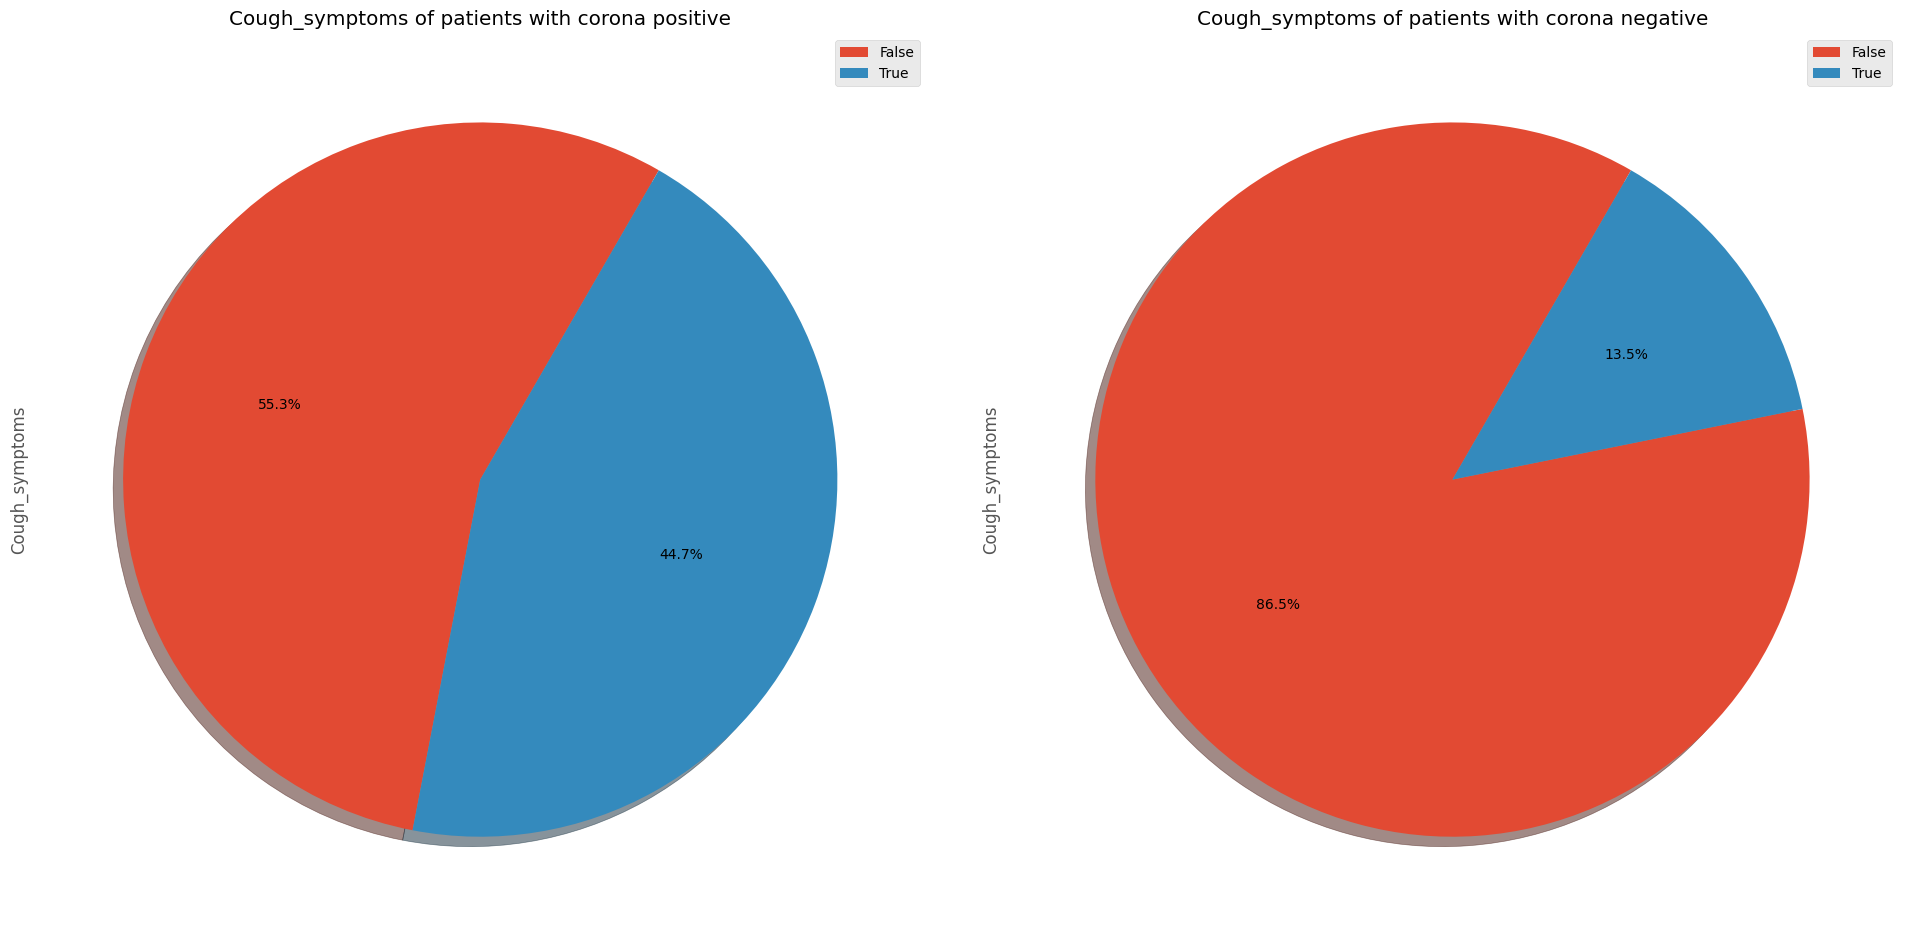

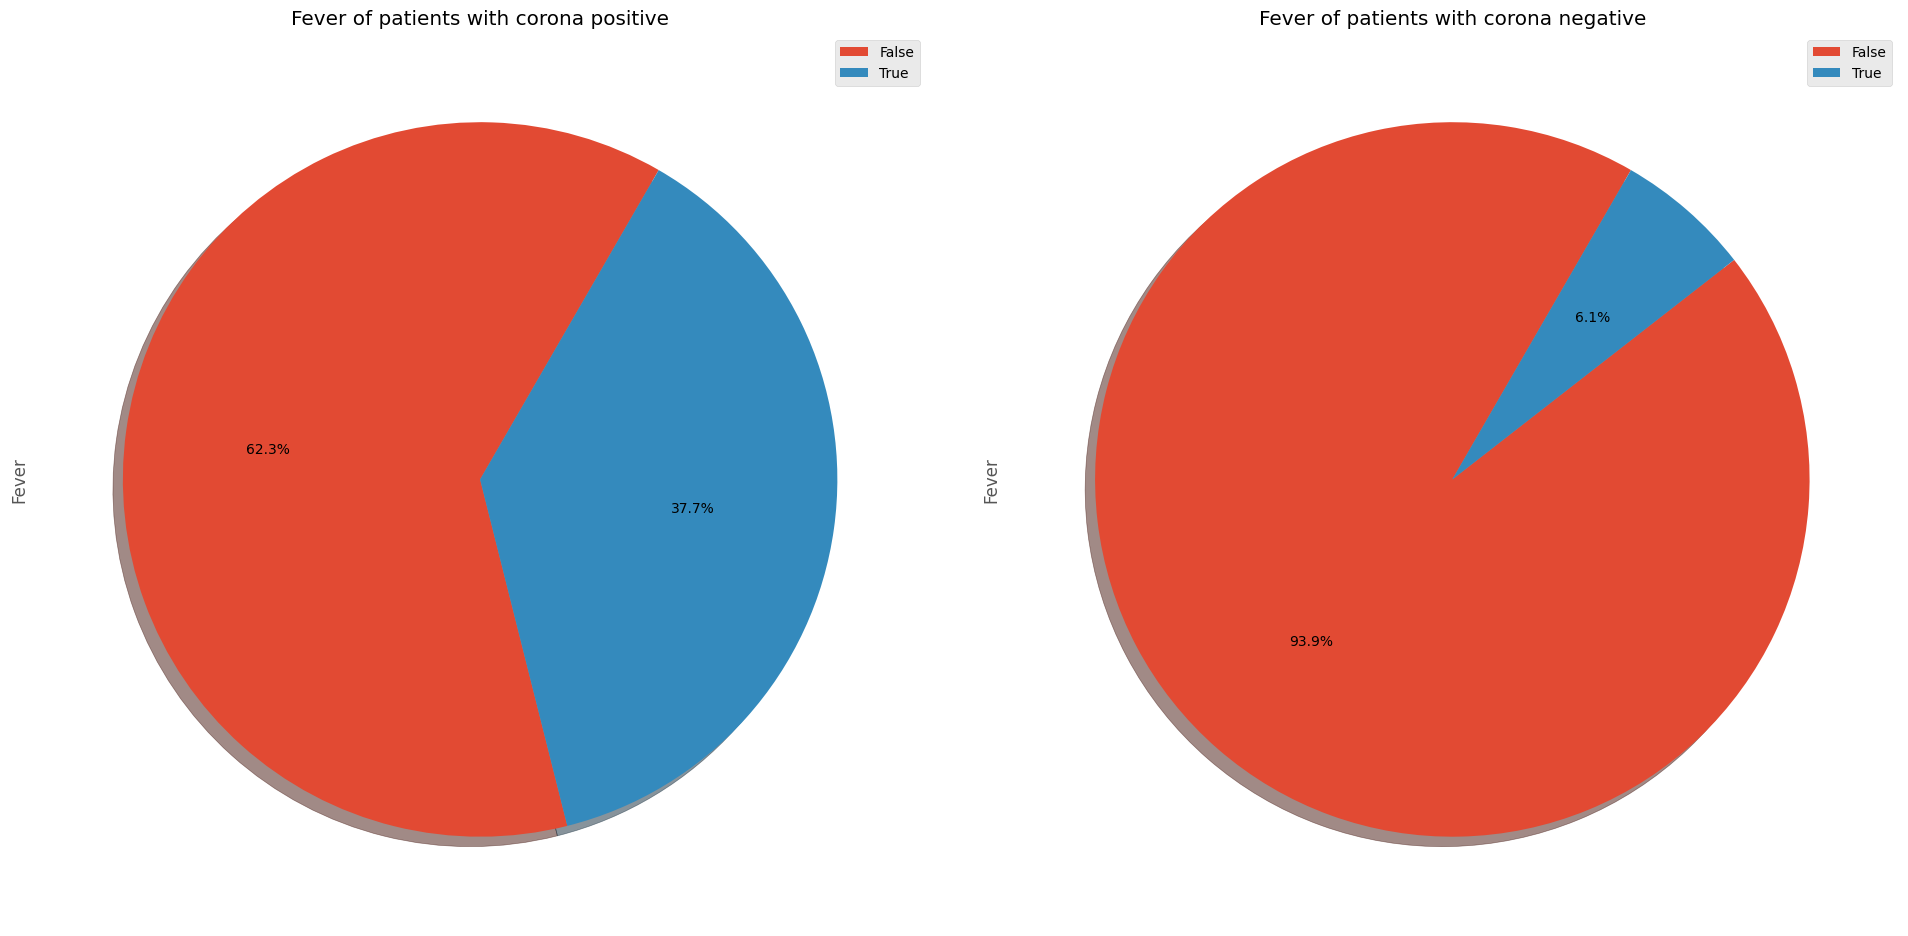

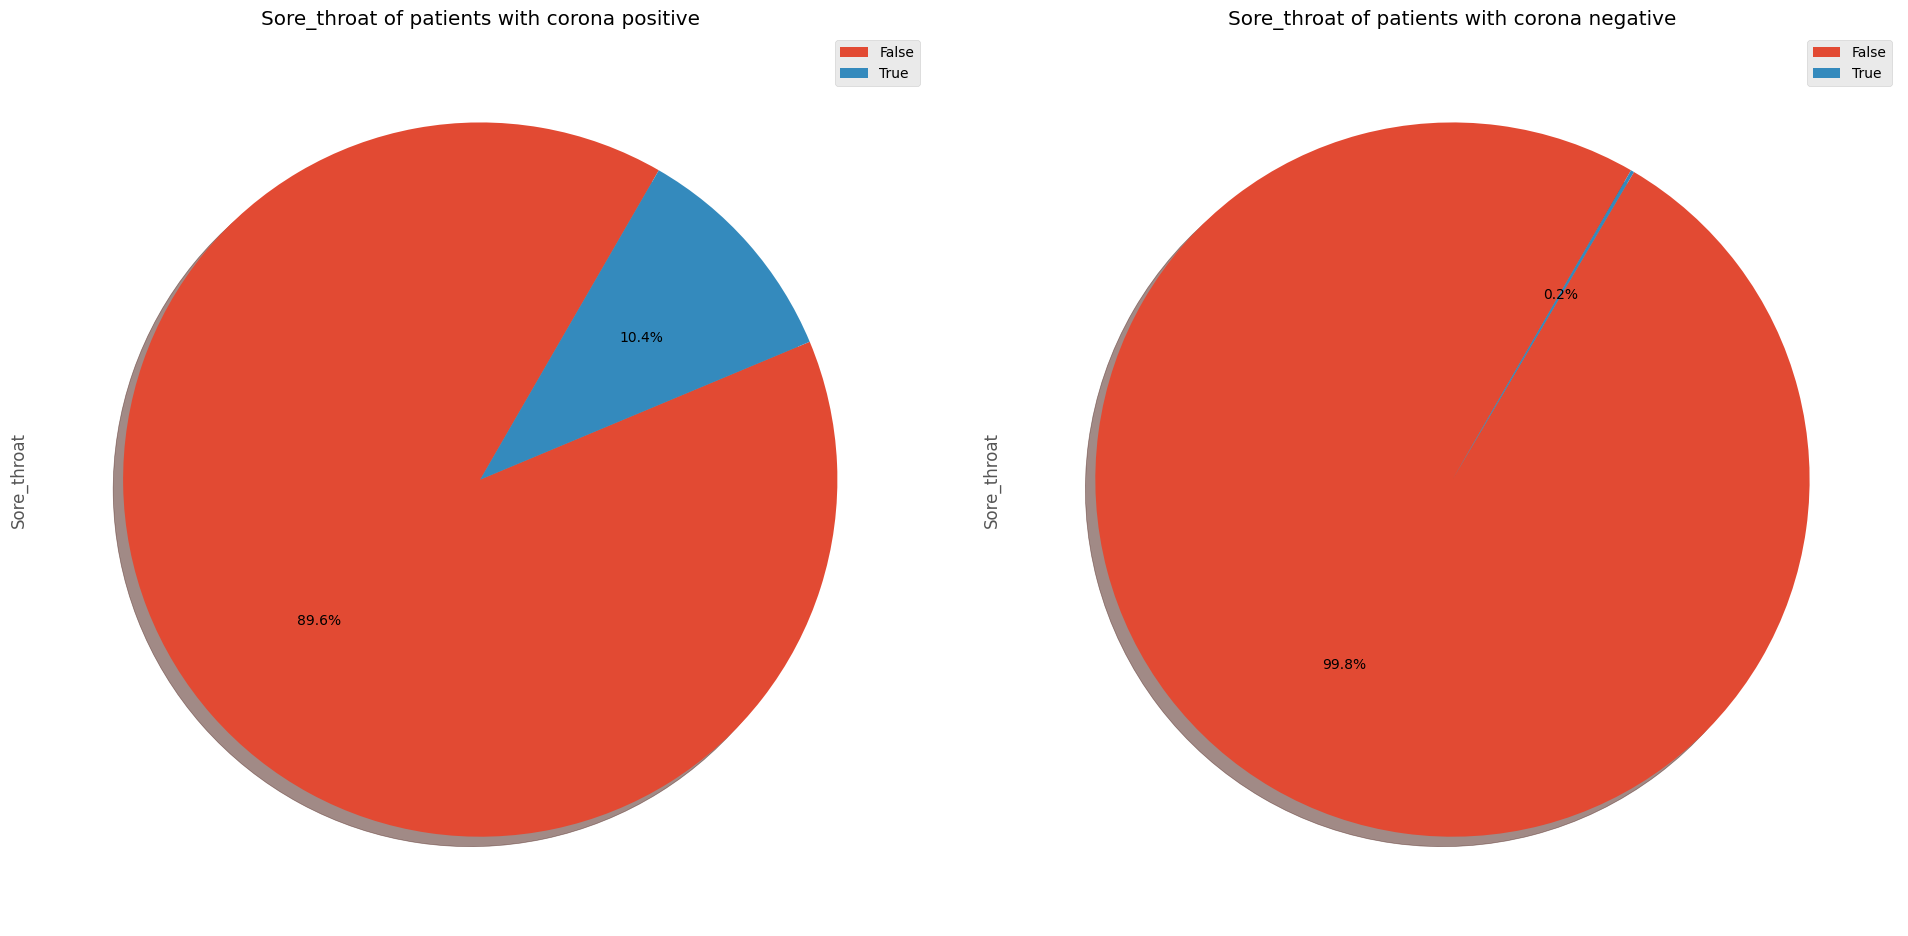

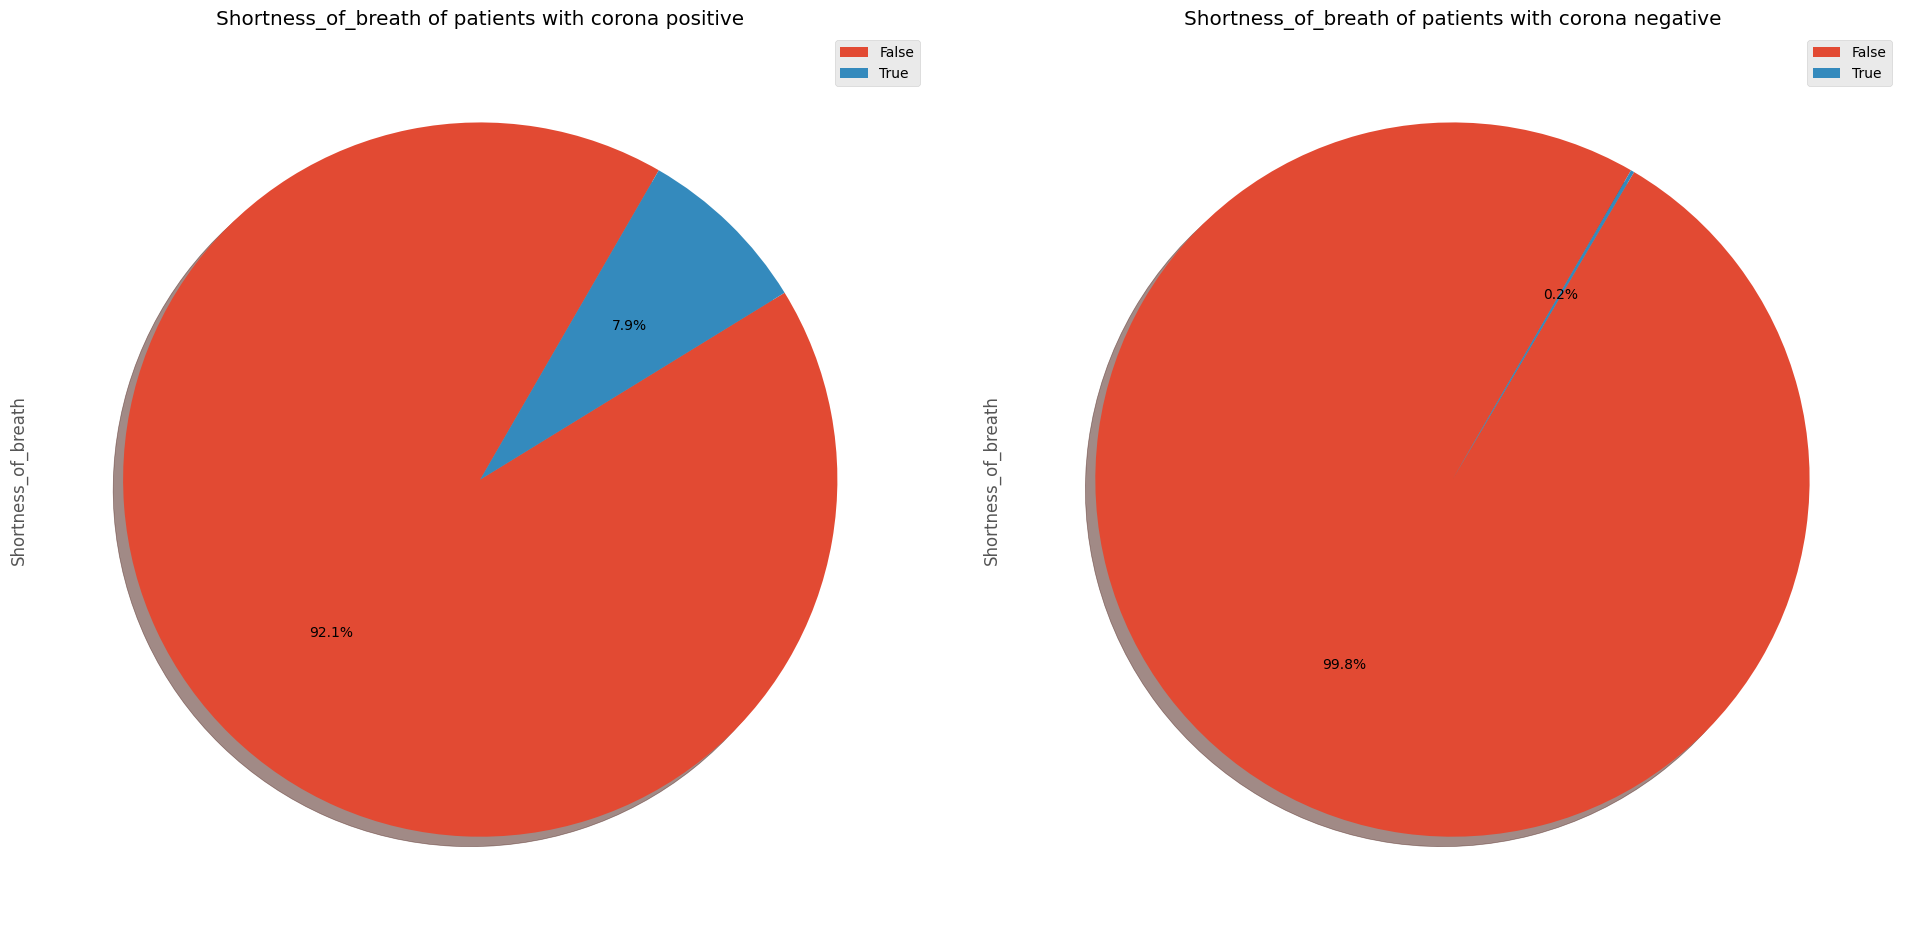

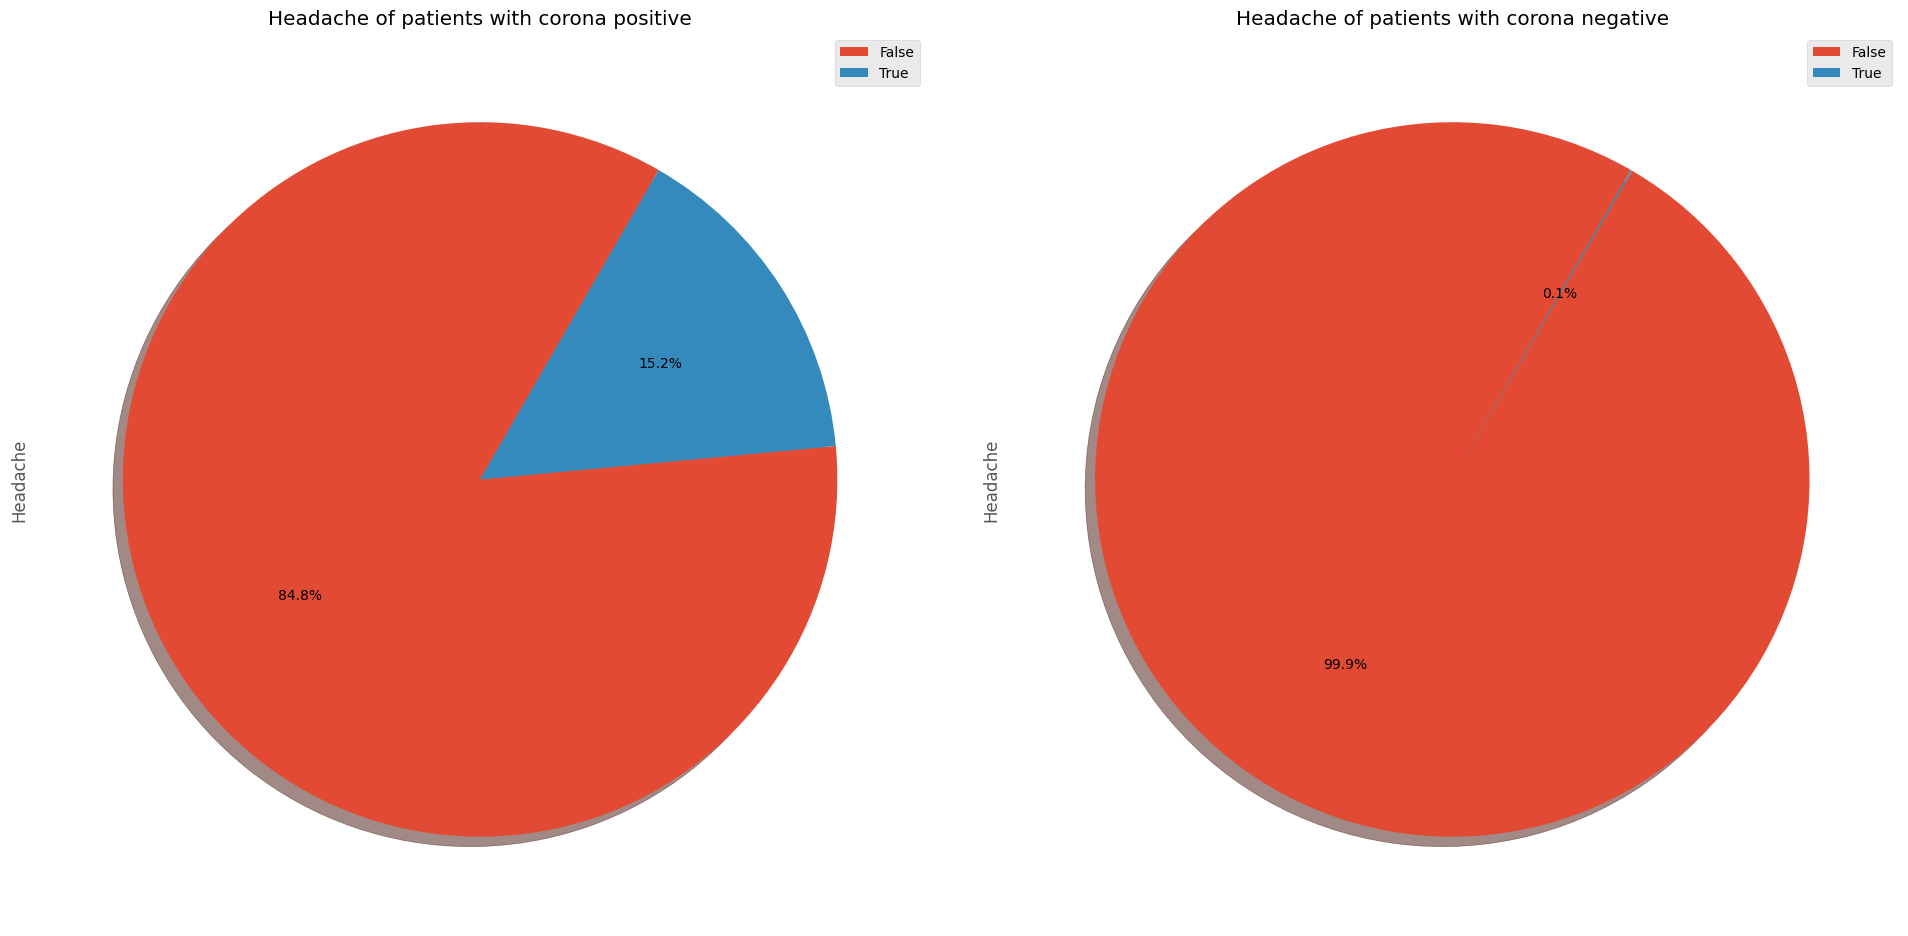

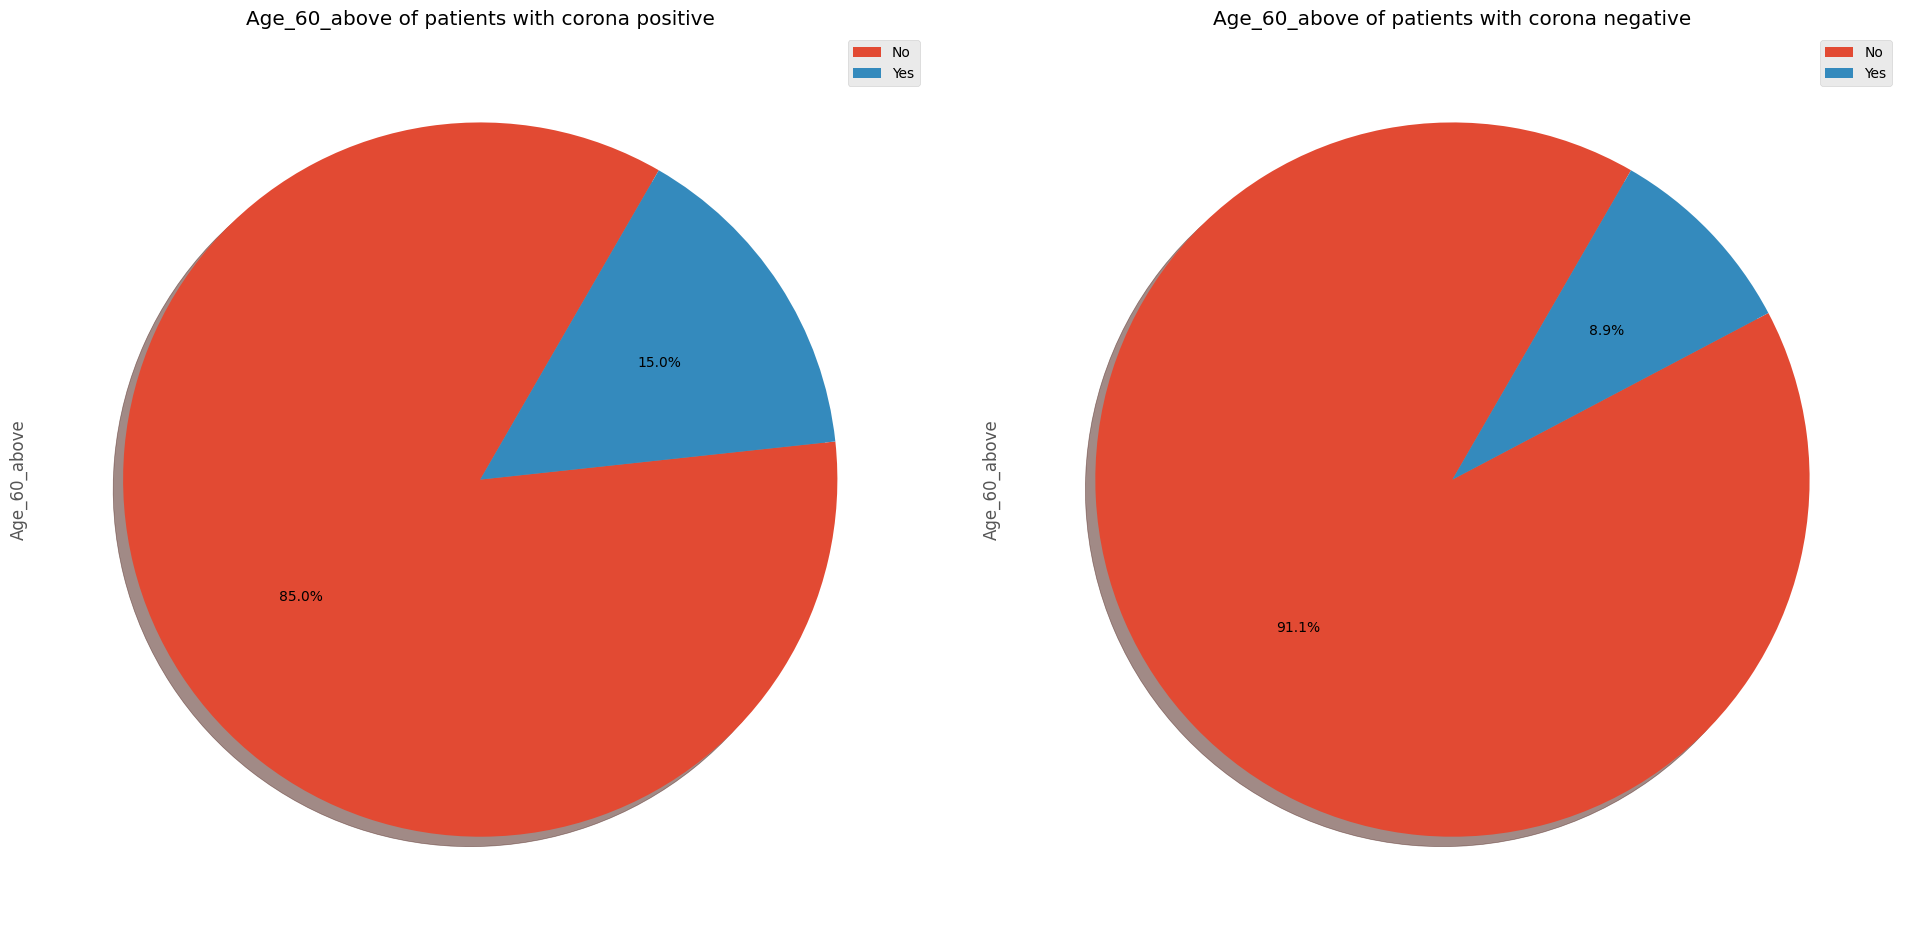

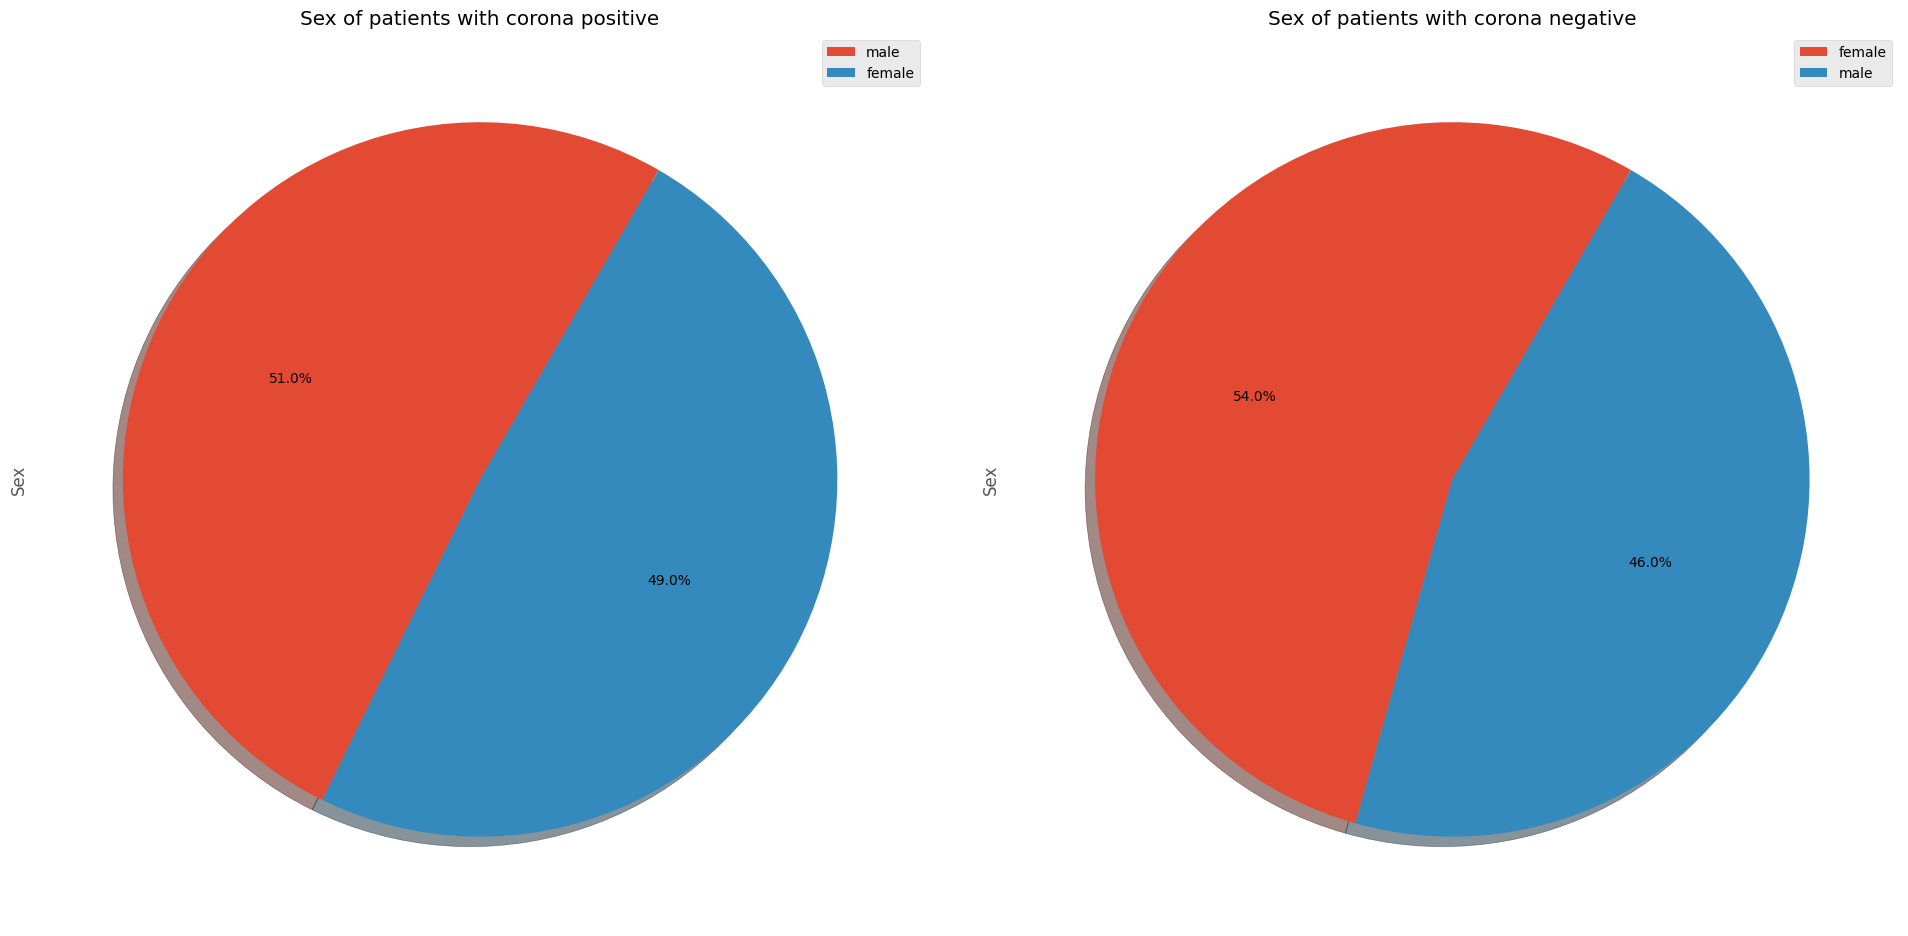

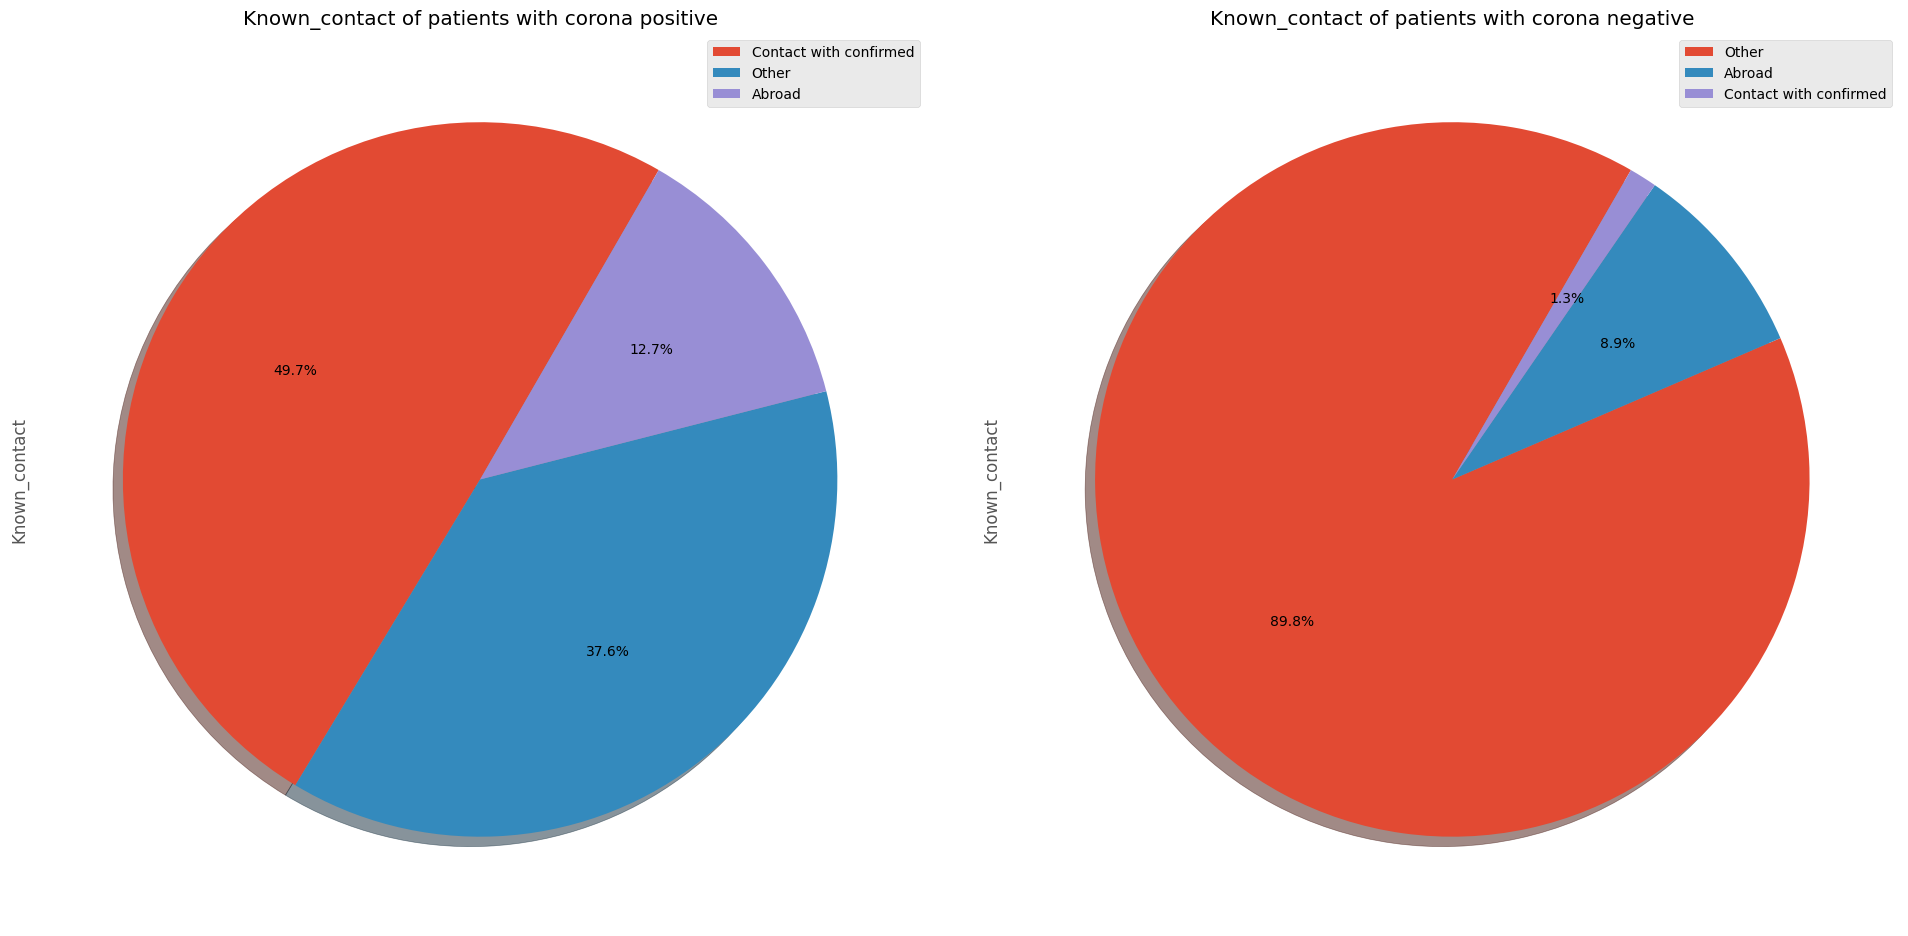

In [83]:
#plotting pie chart with symptoms and corona positive or negative

p_plot=['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Age_60_above','Sex','Known_contact']
for i in p_plot:
    plt.style.use('ggplot')
    plt.figure(figsize = [20,12])
    # for patients with corona positive
    plt.subplot(1,2,1)
    plt.title(f'{i} of patients with corona positive')
    df_positive[i].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=60, labeldistance=None)
    plt.legend()
    # for patients with corona negative
    plt.subplot(1,2,2)
    plt.title(f'{i} of patients with corona negative')
    df_negative[i].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=60, labeldistance=None)
    plt.legend()
    plt.tight_layout(pad = 4)
    plt.show()

#### Observations :

Cough_Symptoms and Fever are the most common symptoms among Corona positive patients.

Almost 50% of Corona Positive patients have Known_Contact Abroad.

Among corona positive patients male are more than females.

Sore_throat, Shortness_of breath and Headache these symptoms are not in Corona negative patients.

Cough and Fever are the most common symptoms among COVID positive males whose known contact was abroad.

Headache, Shortness of Breath, Sore throat symptom was less common among COVID negative people.

There are 366 corona negative patients who have Sore throat.

There are 1164 corona patients who faced shortness of breath.

<ipython-input-84-c11dd013ef0e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df=df.corr()


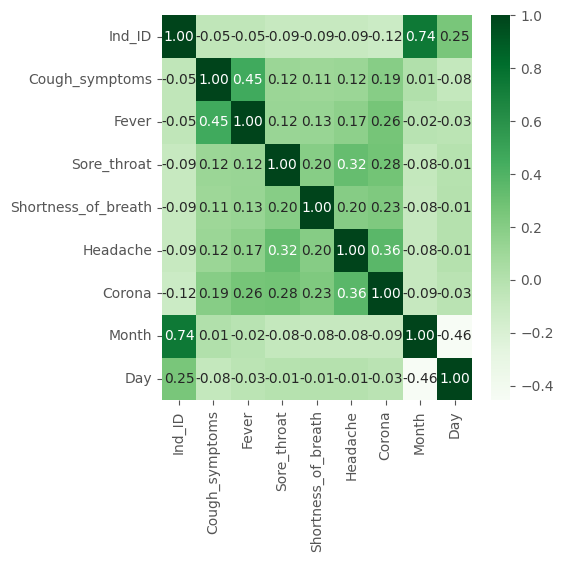

In [84]:
corr_df=df.corr()

plt.figure(figsize = (5,5))
sns.heatmap(data = corr_df, annot = True, cmap = "Greens", cbar = True, fmt='.2f')
plt.show()

In [85]:
df.corr()

<ipython-input-85-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Month,Day
Ind_ID,1.000000,-0.053530,-0.052066,-0.086443,-0.087001,-0.091638,-0.115310,0.742159,0.249742
Cough_symptoms,-0.053530,1.000000,0.454386,0.115637,0.106749,0.116350,0.194711,0.010708,-0.080202
Fever,-0.052066,0.454386,1.000000,0.122832,0.126070,0.168841,0.263649,-0.022785,-0.033805
Sore_throat,-0.086443,0.115637,0.122832,1.000000,0.197540,0.323132,0.275718,-0.076528,-0.011649
Shortness_of_breath,-0.087001,0.106749,0.126070,0.197540,1.000000,0.202538,0.231057,-0.083244,-0.005933
Headache,-0.091638,0.116350,0.168841,0.323132,0.202538,1.000000,0.364739,-0.080500,-0.005332
Corona,-0.115310,0.194711,0.263649,0.275718,0.231057,0.364739,1.000000,-0.085271,-0.027177
Month,0.742159,0.010708,-0.022785,-0.076528,-0.083244,-0.080500,-0.085271,1.000000,-0.455831
Day,0.249742,-0.080202,-0.033805,-0.011649,-0.005933,-0.005332,-0.027177,-0.455831,1.000000


#### Observations :

- we can see caugh symptoms and fever symptoms are moderately correlation.

## 4.1 Feature Engineering

It is the process of transforming the features that better represent the underlying problem to predictive models, resulting in improved model accuracy on unseen data.

It includes feature creation, Feature scaling,feature extraction and feature selection.

#### Here , we will convert categorical data into numerical data first.

In [86]:
df

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,Date,Month,Day
0,1,True,False,True,False,False,0,No,female,Abroad,2020-03-11,3,11
1,2,False,True,False,False,False,1,No,female,Abroad,2020-03-11,3,11
2,3,False,True,False,False,False,1,No,female,Abroad,2020-03-11,3,11
3,4,True,False,False,False,False,0,No,female,Abroad,2020-03-11,3,11
4,5,True,False,False,False,False,0,No,female,Contact with confirmed,2020-03-11,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,False,False,False,False,False,1,No,male,Other,2020-04-30,4,30
278844,278845,False,False,False,False,False,0,No,female,Other,2020-04-30,4,30
278845,278846,False,False,False,False,False,0,No,male,Other,2020-04-30,4,30
278846,278847,False,False,False,False,False,0,No,male,Other,2020-04-30,4,30


- Here , we have all the columns in object and boolean datatype.
- We need to convert all of them into numnerical for model building purposes as models understand only numerical values.
- We also have date, month,Ind_ID column , we don't need this columns now as we need to do Train/Test Split based on the date.
- we will delete this columns after we do Train/Test Split.
let's do encoding and convert remaining columns into numerical values.

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Ind_ID               278848 non-null  int64         
 1   Cough_symptoms       278848 non-null  bool          
 2   Fever                278848 non-null  bool          
 3   Sore_throat          278848 non-null  bool          
 4   Shortness_of_breath  278848 non-null  bool          
 5   Headache             278848 non-null  bool          
 6   Corona               278848 non-null  int64         
 7   Age_60_above         278848 non-null  object        
 8   Sex                  278848 non-null  object        
 9   Known_contact        278848 non-null  object        
 10  Date                 278848 non-null  datetime64[ns]
 11  Month                278848 non-null  int64         
 12  Day                  278848 non-null  int64         
dtypes: bool(5), da

In [88]:
#fetching unique values of features
print(df['Cough_symptoms'].unique())
print(df['Fever'].unique())
print(df['Sore_throat'].unique())
print(df['Shortness_of_breath'].unique())
print(df['Headache'].unique())
print(df['Age_60_above'].unique())
print(df['Sex'].unique())
print(df['Known_contact'].unique())

[ True False]
[False  True]
[ True False]
[False  True]
[False  True]
['No' 'Yes']
['female' 'male']
['Abroad' 'Contact with confirmed' 'Other']


#### 4.1.1 encoding Independent variable columns using Label Encoder

In [89]:
from sklearn.preprocessing import LabelEncoder

#performing label encoding on Age_60_above, Sex , Known_contact columns
df[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Age_60_above', 'Sex' , 'Known_contact']] =df[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Age_60_above', 'Sex' , 'Known_contact']].apply(LabelEncoder().fit_transform)

In [90]:
# 'Cough_symptoms' (TRUE = 1 , FALSE = 0)
# 'FEVER' (TRUE = 1 , FALSE = 0)
# 'Sore_throat' (TRUE = 1 , FALSE = 0)
# 'Shortness_of_breath' (TRUE = 1 , FALSE = 0)
# 'Headache' (TRUE = 1 , FALSE = 0)
# Corona (Positive =1 , Negative = 0)
# Age_60_above (No=0 , Unknown = 1 , Yes = 2)
# Sex (Unknown=0, Female=1, Male=2)
# Known_contact (Abroad=0, Contact with confirmed = 1, other = 2)

In [91]:
df

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,Date,Month,Day
0,1,1,0,1,0,0,0,0,0,0,2020-03-11,3,11
1,2,0,1,0,0,0,1,0,0,0,2020-03-11,3,11
2,3,0,1,0,0,0,1,0,0,0,2020-03-11,3,11
3,4,1,0,0,0,0,0,0,0,0,2020-03-11,3,11
4,5,1,0,0,0,0,0,0,0,1,2020-03-11,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,0,0,0,0,0,1,0,1,2,2020-04-30,4,30
278844,278845,0,0,0,0,0,0,0,0,2,2020-04-30,4,30
278845,278846,0,0,0,0,0,0,0,1,2,2020-04-30,4,30
278846,278847,0,0,0,0,0,0,0,1,2,2020-04-30,4,30


In [92]:
df.nunique()

Ind_ID                 278848
Cough_symptoms              2
Fever                       2
Sore_throat                 2
Shortness_of_breath         2
Headache                    2
Corona                      2
Age_60_above                2
Sex                         2
Known_contact               3
Date                       51
Month                       2
Day                        31
dtype: int64

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Ind_ID               278848 non-null  int64         
 1   Cough_symptoms       278848 non-null  int64         
 2   Fever                278848 non-null  int64         
 3   Sore_throat          278848 non-null  int64         
 4   Shortness_of_breath  278848 non-null  int64         
 5   Headache             278848 non-null  int64         
 6   Corona               278848 non-null  int64         
 7   Age_60_above         278848 non-null  int64         
 8   Sex                  278848 non-null  int64         
 9   Known_contact        278848 non-null  int64         
 10  Date                 278848 non-null  datetime64[ns]
 11  Month                278848 non-null  int64         
 12  Day                  278848 non-null  int64         
dtypes: datetime64[

In [94]:
df.to_csv("cleaned.csv")

In [95]:
df

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,Date,Month,Day
0,1,1,0,1,0,0,0,0,0,0,2020-03-11,3,11
1,2,0,1,0,0,0,1,0,0,0,2020-03-11,3,11
2,3,0,1,0,0,0,1,0,0,0,2020-03-11,3,11
3,4,1,0,0,0,0,0,0,0,0,2020-03-11,3,11
4,5,1,0,0,0,0,0,0,0,1,2020-03-11,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,0,0,0,0,0,1,0,1,2,2020-04-30,4,30
278844,278845,0,0,0,0,0,0,0,0,2,2020-04-30,4,30
278845,278846,0,0,0,0,0,0,0,1,2,2020-04-30,4,30
278846,278847,0,0,0,0,0,0,0,1,2,2020-04-30,4,30


#### 4.1.2 Examining Multicollinearity using VIF

In [96]:
# Examine multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = df[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Age_60_above','Sex','Known_contact']]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]

print(vif_data)

               feature       VIF
0       Cough_symptoms  1.430616
1                Fever  1.395439
2          Sore_throat  1.154947
3  Shortness_of_breath  1.080994
4             Headache  1.170408
5         Age_60_above  1.100688
6                  Sex  1.773517
7        Known_contact  1.782919


###### Observations :

- The default VIF cutoff value is 5; only variables with a VIF less than 5 will be included in the model.
- We have all the VIF value less than 5.
- VIF <= 5 considered as Considerable Collinearity.
- So , we are good to go with all the features.

## 4.2 Train/Test Split based on date

As per our business requirement we have to take data from 11th March 2020 to 15th April 2020 as Training Set & Validation Set.

And , data from 16th April to 30th april as Test Set.

In [97]:
df

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,Date,Month,Day
0,1,1,0,1,0,0,0,0,0,0,2020-03-11,3,11
1,2,0,1,0,0,0,1,0,0,0,2020-03-11,3,11
2,3,0,1,0,0,0,1,0,0,0,2020-03-11,3,11
3,4,1,0,0,0,0,0,0,0,0,2020-03-11,3,11
4,5,1,0,0,0,0,0,0,0,1,2020-03-11,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,0,0,0,0,0,1,0,1,2,2020-04-30,4,30
278844,278845,0,0,0,0,0,0,0,0,2,2020-04-30,4,30
278845,278846,0,0,0,0,0,0,0,1,2,2020-04-30,4,30
278846,278847,0,0,0,0,0,0,0,1,2,2020-04-30,4,30


In [98]:
#As per our business requirement we have to take data from 11th March 2020 to 15th April 2020 as Training Set & Validation.
#And , data from 16th April to 30th april as Test Set.
break_date = pd.Timestamp("2020-04-15")
df_train_valid = df[df["Date"] <= break_date]
df_test = df[df["Date"] > break_date]


In [99]:
#data from 11th march 2020 to 15th april 2020
df_train_valid

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,Date,Month,Day
0,1,1,0,1,0,0,0,0,0,0,2020-03-11,3,11
1,2,0,1,0,0,0,1,0,0,0,2020-03-11,3,11
2,3,0,1,0,0,0,1,0,0,0,2020-03-11,3,11
3,4,1,0,0,0,0,0,0,0,0,2020-03-11,3,11
4,5,1,0,0,0,0,0,0,0,1,2020-03-11,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163184,163185,0,0,0,0,0,0,0,1,2,2020-04-15,4,15
163185,163186,0,0,0,0,0,0,0,1,2,2020-04-15,4,15
163186,163187,0,0,0,0,0,0,0,0,2,2020-04-15,4,15
163187,163188,0,0,0,0,0,0,0,1,2,2020-04-15,4,15


In [100]:
#data from 16th april to 30th april
df_test

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,Date,Month,Day
163189,163190,1,0,0,0,0,0,0,0,0,2020-04-16,4,16
163190,163191,0,0,0,0,0,0,0,0,2,2020-04-16,4,16
163191,163192,1,0,0,0,0,0,0,0,0,2020-04-16,4,16
163192,163193,0,0,0,0,0,0,0,1,2,2020-04-16,4,16
163193,163194,0,0,0,0,0,0,0,1,2,2020-04-16,4,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,0,0,0,0,0,1,0,1,2,2020-04-30,4,30
278844,278845,0,0,0,0,0,0,0,0,2,2020-04-30,4,30
278845,278846,0,0,0,0,0,0,0,1,2,2020-04-30,4,30
278846,278847,0,0,0,0,0,0,0,1,2,2020-04-30,4,30


#### 4.3 Separating Dataset into Training Set , Test Set and Validation Set

In [101]:
#dropping column Test_date and Outcome variable(Corona) column , and storing it to X_train
X_train = df_train_valid.drop(columns = ['Ind_ID','Month','Day','Date','Corona'],axis = 1)
X_train

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact
0,1,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
163184,0,0,0,0,0,0,1,2
163185,0,0,0,0,0,0,1,2
163186,0,0,0,0,0,0,0,2
163187,0,0,0,0,0,0,1,2


In [102]:
#storing outcome variable in y_train.
y_train = df_train_valid['Corona']
y_train

0         0
1         1
2         1
3         0
4         0
         ..
163184    0
163185    0
163186    0
163187    0
163188    0
Name: Corona, Length: 163189, dtype: int64

In [103]:
#dropping Test_date column and Outcome variable(Corona) column from df_test and storing it to X_test.
X_test = df_test.drop(columns = ['Ind_ID','Month','Day','Date','Corona'],axis=1)
X_test

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact
163189,1,0,0,0,0,0,0,0
163190,0,0,0,0,0,0,0,2
163191,1,0,0,0,0,0,0,0
163192,0,0,0,0,0,0,1,2
163193,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...
278843,0,0,0,0,0,0,1,2
278844,0,0,0,0,0,0,0,2
278845,0,0,0,0,0,0,1,2
278846,0,0,0,0,0,0,1,2


In [104]:
#storing Outcome variable test Set data into y_test.
y_test = df_test['Corona']
print(y_test)

163189    0
163190    0
163191    0
163192    0
163193    0
         ..
278843    1
278844    0
278845    0
278846    0
278847    0
Name: Corona, Length: 115659, dtype: int64


In [105]:
#As we have to divide into 4:1 means 20%
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state= 8)

In [106]:

#Training Set
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

#Test Set
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

#Validation Set
print("X_val shape: {}".format(X_val.shape))
print("y val shape: {}".format(y_val.shape))

X_train shape: (130551, 8)
y_train shape: (130551,)
X_test shape: (115659, 8)
y_test shape: (115659,)
X_val shape: (32638, 8)
y val shape: (32638,)


## 4.4 Feature Scaling

In [107]:
# performing transformation of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[-0.46576929, -0.31929184, -0.10878882, ..., -0.43347016,
         1.10509605,  0.41574424],
       [-0.46576929, -0.31929184, -0.10878882, ..., -0.43347016,
         1.10509605,  0.41574424],
       [-0.46576929, -0.31929184, -0.10878882, ...,  2.30696388,
         1.10509605,  0.41574424],
       ...,
       [-0.46576929,  3.13193096, -0.10878882, ..., -0.43347016,
        -0.90489872, -2.71678837],
       [-0.46576929, -0.31929184, -0.10878882, ..., -0.43347016,
        -0.90489872,  0.41574424],
       [-0.46576929, -0.31929184, -0.10878882, ..., -0.43347016,
         1.10509605,  0.41574424]])

In [108]:
X_test=sc.transform(X_test)
X_test

array([[ 2.14698569, -0.31929184, -0.10878882, ..., -0.43347016,
        -0.90489872, -2.71678837],
       [-0.46576929, -0.31929184, -0.10878882, ..., -0.43347016,
        -0.90489872,  0.41574424],
       [ 2.14698569, -0.31929184, -0.10878882, ..., -0.43347016,
        -0.90489872, -2.71678837],
       ...,
       [-0.46576929, -0.31929184, -0.10878882, ..., -0.43347016,
         1.10509605,  0.41574424],
       [-0.46576929, -0.31929184, -0.10878882, ..., -0.43347016,
         1.10509605,  0.41574424],
       [-0.46576929, -0.31929184, -0.10878882, ..., -0.43347016,
        -0.90489872,  0.41574424]])

## 5. Build the Algorithm

#### 5.1 Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression
### Creating a Logistic regression object
lr = LogisticRegression(random_state = 0)
### Passing independant and dependant training data to the model
lr.fit(X_train,y_train)

#printing and defining Logistic Regression

LogisticRegression(random_state=0)

#### 5.2 KNeighborsClassifier (KNN)

In [110]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)

#printing and defining KNeighborsClassifier (KNN)

KNeighborsClassifier()

#### 5.3 Decision Tree

In [113]:
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier
from sklearn import metrics #Importing scikit-learn metrics module for accuracy calculation
from sklearn import tree

# Create Decision Tree classifer object
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 3)

# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)
#printing and defining Decision Tree

#### 5.4 Random Forest

In [112]:
#Fitting Decision Tree classifier to the training set
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators= 10, criterion="entropy")
rf.fit(X_train, y_train)
#printing and defining Random Forest

RandomForestClassifier(criterion='entropy', n_estimators=10)

## Making Prediction

#### 1. Making prediction on test by using logistic Regression

In [115]:
## Making prediction on test dataset
lr_pred=lr.predict(X_test)

#### 2. Making prediction on test by using KNN

In [116]:
## Making prediction on test dataset
knn_pred=knn.predict(X_test)

#### 3. Making prediction on test using Decision Tree

In [114]:
## Making prediction on test dataset
dt_pred=dt.predict(X_test)

#### 4. Making prediction on test using Random Forest

In [117]:
## Making prediction on test dataset
rf_pred=rf.predict(X_test)

## Model evaluation

Logistic Regression

Accuracy: 0.9764825910651138
Precision Score 0.25
Score Of Confusion Matrix [[112928     33]
 [  2687     11]]


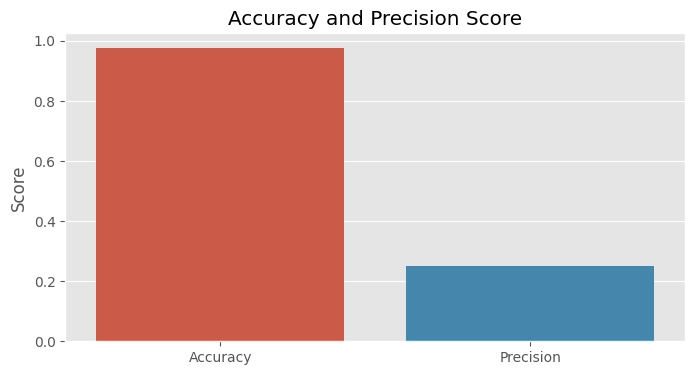

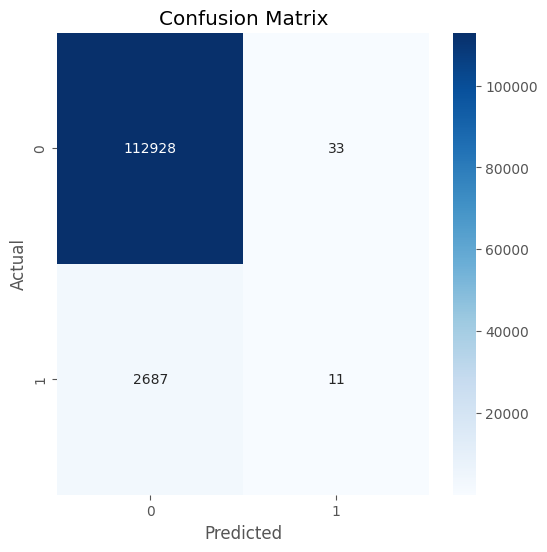

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    112961
           1       0.25      0.00      0.01      2698

    accuracy                           0.98    115659
   macro avg       0.61      0.50      0.50    115659
weighted avg       0.96      0.98      0.97    115659



In [119]:
from sklearn.metrics import accuracy_score,precision_score, confusion_matrix, classification_report

accuracy_lr = accuracy_score(y_test, lr_pred)
print("Accuracy:", accuracy_lr)

lr_precision = precision_score(y_test, lr_pred,zero_division=0)
print("Precision Score",lr_precision)

lr_confusion_matrix = confusion_matrix(y_test, lr_pred)
print("Score Of Confusion Matrix",lr_confusion_matrix)

lr_classification_report = classification_report(y_test, lr_pred,zero_division=0)

plt.figure(figsize=(8, 4))
scores = {'Accuracy': accuracy_lr, 'Precision': lr_precision}
sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.title('Accuracy and Precision Score')
plt.ylabel('Score')
plt.show()

plt.figure(figsize=(6, 6))
sns.heatmap(lr_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report:")
print(lr_classification_report)

KNN Algorithm

Accuracy: 0.9764825910651138
Precision Score 0.7740315638450502
Score Of Confusion Matrix [[112646    315]
 [  1619   1079]]


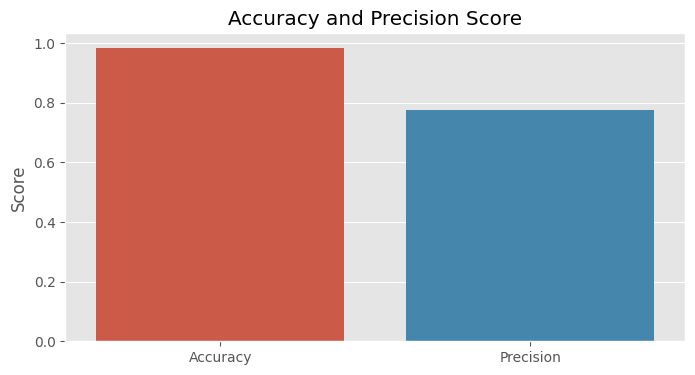

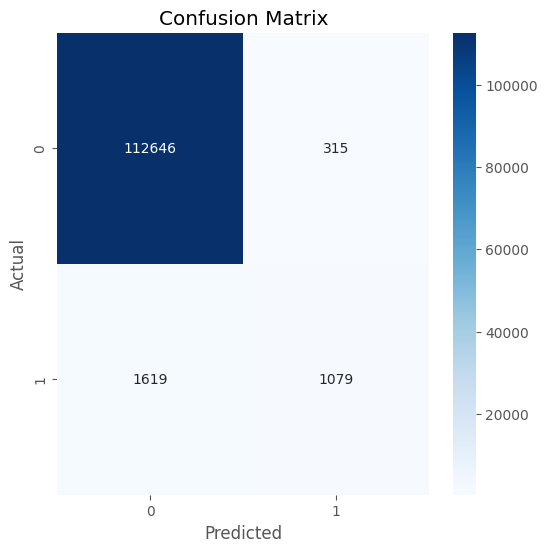

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    112961
           1       0.77      0.40      0.53      2698

    accuracy                           0.98    115659
   macro avg       0.88      0.70      0.76    115659
weighted avg       0.98      0.98      0.98    115659



In [120]:
from sklearn.metrics import accuracy_score,precision_score, confusion_matrix, classification_report

accuracy_knn = accuracy_score(y_test, knn_pred)
print("Accuracy:", accuracy_lr)

knn_precision = precision_score(y_test, knn_pred,zero_division=0)
print("Precision Score",knn_precision)

knn_confusion_matrix = confusion_matrix(y_test, knn_pred)
print("Score Of Confusion Matrix",knn_confusion_matrix)

knn_classification_report = classification_report(y_test, knn_pred,zero_division=0)

plt.figure(figsize=(8, 4))
scores = {'Accuracy': accuracy_knn, 'Precision': knn_precision}
sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.title('Accuracy and Precision Score')
plt.ylabel('Score')
plt.show()

plt.figure(figsize=(6, 6))
sns.heatmap(knn_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report:")
print(knn_classification_report)

Decision Tree Algorithm

Accuracy: 0.9853794343717307
Precision Score 0.7493808816245666
Score Of Confusion Matrix [[112455    506]
 [  1185   1513]]


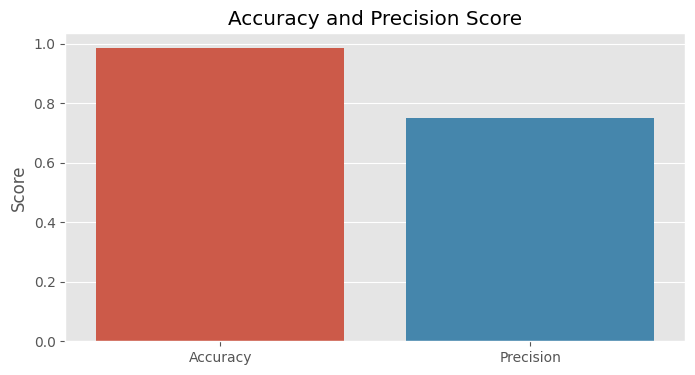

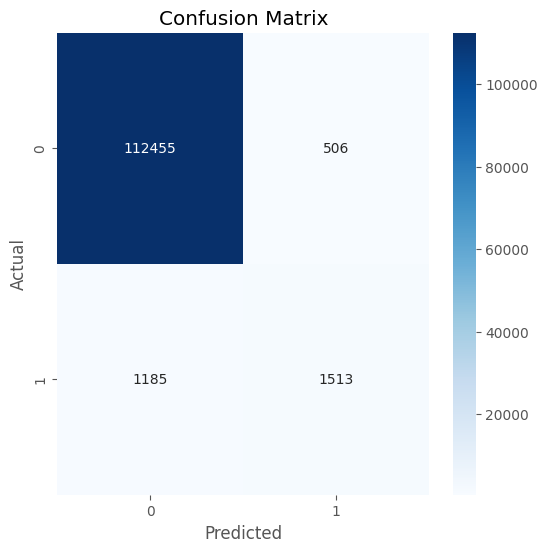

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    112961
           1       0.75      0.56      0.64      2698

    accuracy                           0.99    115659
   macro avg       0.87      0.78      0.82    115659
weighted avg       0.98      0.99      0.98    115659



In [121]:
from sklearn.metrics import precision_score, confusion_matrix, classification_report

accuracy_dt = accuracy_score(y_test, dt_pred)
print("Accuracy:", accuracy_dt)

dt_precision = precision_score(y_test, dt_pred,zero_division=0)
print("Precision Score",dt_precision)

dt_confusion_matrix = confusion_matrix(y_test, dt_pred)
print("Score Of Confusion Matrix",dt_confusion_matrix)

dt_classification_report = classification_report(y_test, dt_pred,zero_division=0)

plt.figure(figsize=(8, 4))
scores = {'Accuracy': accuracy_dt, 'Precision': dt_precision}
sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.title('Accuracy and Precision Score')
plt.ylabel('Score')
plt.show()

plt.figure(figsize=(6, 6))
sns.heatmap(dt_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report:")
print(dt_classification_report)

Random Forest

Accuracy: 0.9837799047199094
Precision Score 0.768979057591623
Score Of Confusion Matrix [[112646    315]
 [  1619   1079]]


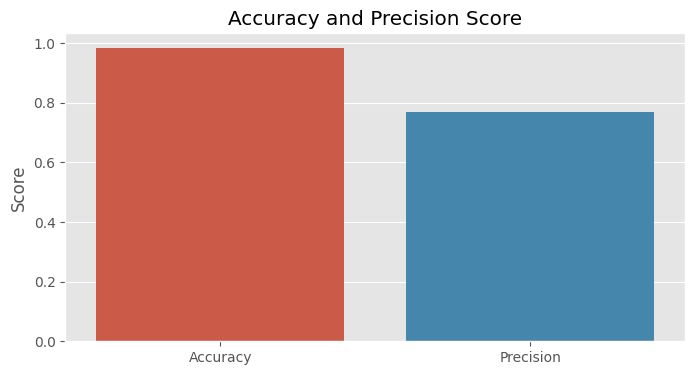

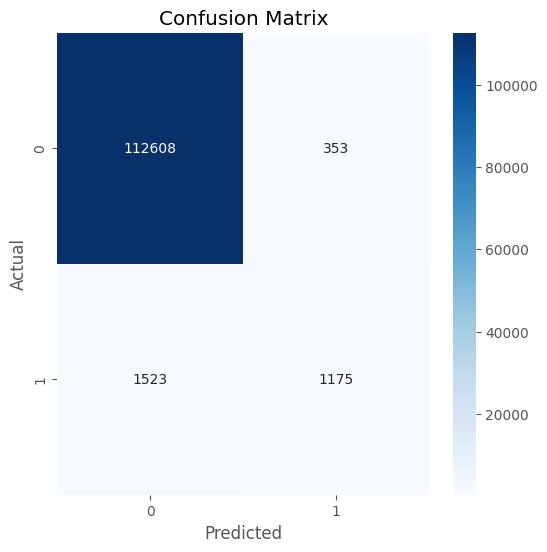

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    112961
           1       0.77      0.40      0.53      2698

    accuracy                           0.98    115659
   macro avg       0.88      0.70      0.76    115659
weighted avg       0.98      0.98      0.98    115659



In [122]:
from sklearn.metrics import accuracy_score,precision_score, confusion_matrix, classification_report

accuracy_rf = accuracy_score(y_test, rf_pred)
print("Accuracy:", accuracy_rf)

rf_precision = precision_score(y_test, rf_pred,zero_division=0)
print("Precision Score",rf_precision)

rf_confusion_matrix = confusion_matrix(y_test, rf_pred)
print("Score Of Confusion Matrix",knn_confusion_matrix)

rf_classification_report = classification_report(y_test, rf_pred,zero_division=0)

plt.figure(figsize=(8, 4))
scores = {'Accuracy': accuracy_rf, 'Precision': rf_precision}
sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.title('Accuracy and Precision Score')
plt.ylabel('Score')
plt.show()

plt.figure(figsize=(6, 6))
sns.heatmap(rf_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report:")
print(knn_classification_report)

## Conclusion


- We are getting 98% accuracy using Decision Tree , RandomForest and KNN
- with Logistics regression we are getting 97% accuracy.
- So, for deployment we can use any model between best three.

We got best accuracy using Decision Tree, RandomForest and KNN.

## Making a Predictive Model

In [123]:
# 'Cough_symptoms' (TRUE = 1 , FALSE = 0)
# 'FEVER' (TRUE = 1 , FALSE = 0)
# 'Sore_throat' (TRUE = 1 , FALSE = 0)
# 'Shortness_of_breath' (TRUE = 1 , FALSE = 0)
# 'Headache' (TRUE = 1 , FALSE = 0)
# Corona (Positive =1 , Negative = 0)
# Age_60_above (No=0 , Unknown = 1 , Yes = 2)
# Sex (Unknown=0, Female=1, Male=2)
# Known_contact (Abroad=0, Contact with confirmed = 1, other = 2)

In [124]:
input_data = (1,1,1,0,1,1,2,2)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = sc.transform(input_data_reshaped)
print(std_data)

prediction = knn.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is corona negative')
else:
  print('The person is corona positive')

[[ 2.14698569  3.13193096  9.192121   -0.09720478  8.137876    2.30696388
   3.11509082  0.41574424]]
[1]
The person is corona positive


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
